In [28]:
import pandas as pd
kenya = pd.read_csv('/content/social-protection-and-labor_ken.csv')
print("Shape of the dataset: ", kenya.shape)
kenya.head()

Shape of the dataset:  (4126, 6)


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Kenya,KEN,2015,Adequacy of benefits in extreme poor (<$2.15 a...,per_allsp.adq_ep_preT_tot,12.373660
1,Kenya,KEN,2005,Adequacy of benefits in extreme poor (<$2.15 a...,per_allsp.adq_ep_preT_tot,50.803057
2,Kenya,KEN,2015,Adequacy of benefits in extreme poor (<$2.15 a...,per_allsp.adq_ep_tot,9.616568
3,Kenya,KEN,2005,Adequacy of benefits in extreme poor (<$2.15 a...,per_allsp.adq_ep_tot,6.551053
4,Kenya,KEN,2015,Adequacy of benefits (%) -All Social Protectio...,per_allsp.adq_pop_preT_tot,5.927104


In [30]:
import pandas as pd
kenya = pd.read_csv('/content/social-protection-and-labor_ken.csv')
data= kenya.loc[:,['Year', 'Value']]
data.head()

,Year,Value
0,2015,12.373660
1,2005,50.803057
2,2015,9.616568
3,2005,6.551053
4,2015,5.927104


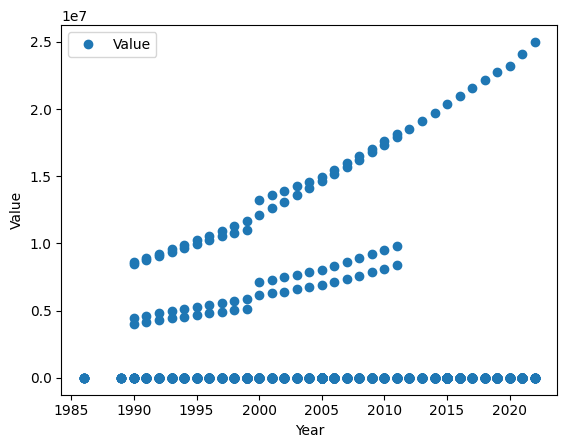

In [31]:
from operator import index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
kenya = pd.read_csv('/content/social-protection-and-labor_ken.csv')
kenya.at[0, 'Value']= np.nan
kenya['Value'] = pd.to_numeric(kenya['Value'])
kenya.plot(x='Year', y='Value', style='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

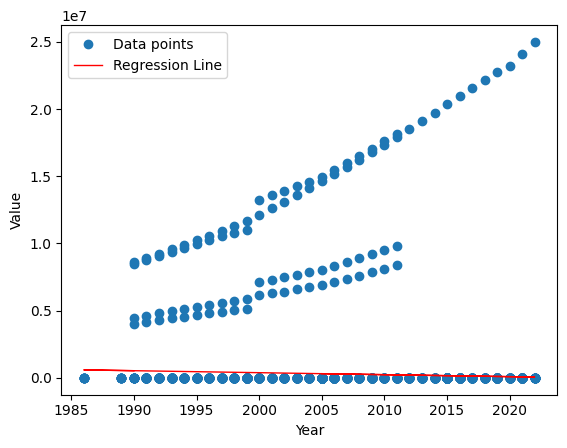

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

kenya = pd.read_csv('/content/social-protection-and-labor_ken.csv')

row_to_remove = 0
kenya = kenya.drop(index=row_to_remove)
kenya['Value']= pd.to_numeric(kenya['Value'])
X = kenya[['Year']]
y = kenya[['Value']]

X = X.astype(float)
y= y.astype(float)

#create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

kenya.plot(x='Year', y='Value', style='o', label='Data points')
#overlay the regression line
plt.plot(X, regressor.predict(X), color='red', linewidth=1, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
kenya = pd.read_csv('/content/social-protection-and-labor_ken.csv')
x= pd.DataFrame(data['Year'])
y = pd.DataFrame(data['Value'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3300, 1)
(826, 1)
(3300, 1)
(826, 1)


In [34]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)

#retrieve the intercept
print(regressor.intercept_)
#retrieve the slope
print(regressor.coef_)

[32182457.81889082]
[[-15888.26535622]]


In [35]:
y_pred = regressor.predict(X_test)
y_pred

array([[421815.37181067],
       [167603.12611118],
       [326485.77967336],
       [104050.0646863 ],
       [167603.12611118],
       [183491.3914674 ],
       [326485.77967336],
       [167603.12611118],
       [135826.59539874],
       [548921.49466041],
       [326485.77967336],
       [453591.9025231 ],
       [326485.77967336],
       [167603.12611118],
       [ 72273.53397387],
       [469480.16787932],
       [167603.12611118],
       [167603.12611118],
       [278820.9836047 ],
       [167603.12611118],
       [135826.59539874],
       [326485.77967336],
       [151714.86075496],
       [167603.12611118],
       [167603.12611118],
       [326485.77967336],
       [326485.77967336],
       [167603.12611118],
       [167603.12611118],
       [167603.12611118],
       [167603.12611118],
       [533033.22930419],
       [167603.12611118],
       [167603.12611118],
       [326485.77967336],
       [326485.77967336],
       [326485.77967336],
       [326485.77967336],
       [1676

In [36]:
y_test.head()

,Value
2711,45.244000
557,0.152686
769,84.506071
2660,69.160310
1247,7.553499


In [38]:
from sklearn import metrics
import numpy as np
#assuming y_test and y_pred are numpy arrays or pandas series
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) #RMSE is the square root of MSE
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared error (MSE):", mse)
print("Root Mean squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 482931.7914516521
Mean Squared error (MSE): 3251930524974.5737
Root Mean squared Error (RMSE): 1803310.9895341329


In [40]:
import joblib
import pickle #import the pickle module
from sklearn.linear_model import LinearRegression
#train your linear regression model
model = LinearRegression()
model.fit(x, y) #replace x and y with your training data
#save the trained model to a file using joblib
joblib.dump(model, 'kenya_Social_protection_and_labour_linear_regression_model.pkl')
#alternatively, you can save the model using pickle
with open('kenya_social_protection_and_labour_linear_regression_model.pkl', 'wb') as file:
  pickle.dump(model, file)